# Prediction on Energy Meter using ML 

In [1]:
import pandas as pd

# Loading Dataset

In [10]:
names = ['Voltage','Current','Power','class']
data1 = pd.read_csv("Energy Meter.csv",names = names)
data1

,Voltage,Current,Power,class
0,0.0000,0.000000,0.000000,NoLoad
1,0.0000,0.000000,0.000000,NoLoad
2,0.0000,0.000000,0.000000,NoLoad
3,0.0000,0.000000,0.000000,NoLoad
4,0.0000,0.000000,0.000000,NoLoad
...,...,...,...,...
395,214.2647,0.847530,181.595761,Risk
396,214.6480,0.850669,182.594400,Risk
397,215.0313,0.850669,182.920461,Risk
398,211.9649,0.850669,180.311970,Risk


# Summarize Dataset

In [16]:
print(data1.shape)
print(data1.head(5))
print(data1.describe())
print(data1.groupby('class').size())

(400, 4)
   Voltage  Current  Power   class
0      0.0      0.0    0.0  NoLoad
1      0.0      0.0    0.0  NoLoad
2      0.0      0.0    0.0  NoLoad
3      0.0      0.0    0.0  NoLoad
4      0.0      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.076849    0.000000
50%    213.114800    0.176985   38.430426
75%    215.031300    0.398765  101.438042
max    304.340200    1.227349  264.859337
class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64


In [21]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

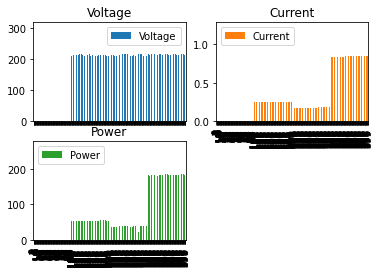

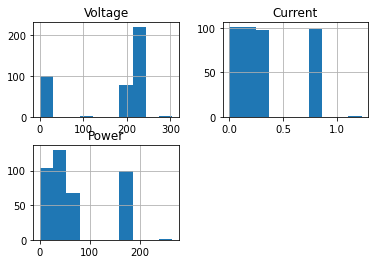

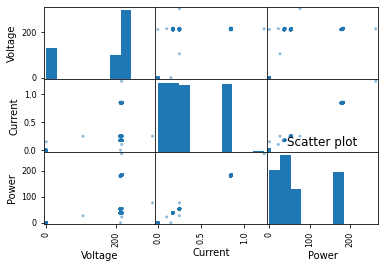

In [22]:
data1.plot(kind = 'bar',subplots = True,layout = (2,2))
pyplot.title('Bar plot')
pyplot.show()

data1.hist()
pyplot.title('Histogram')
pyplot.show()

scatter_matrix(data1)
pyplot.title('Scatter plot')
pyplot.show()

# Evaluating various ML Algos

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [27]:
array = data1.values
x = array[:,0:3]
y = array[:,3]
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size = 0.20,random_state = 1,shuffle = True)

In [29]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma = 'auto')))

# Algo Comparsion

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.993750 (0.018750)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


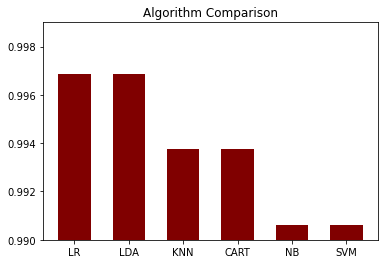

In [34]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10,random_state = None)
    cv_result = cross_val_score(model,x_train,y_train,cv = kfold,scoring = 'accuracy')
    results.append(cv_result)
    names.append(name)
    res.append(cv_result.mean())
    print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))
pyplot.ylim(.990, .999)
pyplot.bar(names, res, color = 'maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

# Since most are at 99% accur , using SVC 

In [36]:
model = SVC(gamma  = 'auto')


In [37]:
model.fit(x_train,y_train)

SVC(gamma='auto')

# Storing the model for future use

In [38]:
import pickle
file1 = 'model.pkl'
pickle.dump(model,open(file1,'wb'))

In [39]:
load_model = pickle.load(open(file1,'rb'))
result = load_model.score(x_validation,y_validation)
print(result)

0.9875


# Final Prediction 

In [42]:
value = [[213.8814,0.173,37.18]]
predict = model.predict(value)
print(predict[0])

Medium


# END OF MODULE